# EPIDEMIC MODELS AND DATA PRE-PROCESSING

In this part you will build upon the SIR model that we saw in Lab1 and extend it to include the class for the Exposed population. You will define the system of ODEs, plotting functions, and solve the problem given some parameters. You will learn how to use the scipy library to solve differential equations and do some baseline scientific computing! The task here is to see how by using python we can model a disease's spread in a city or population, do data analysis and visualize our results.  The advanced task of this part introduces a lockdown policy in the population.

##  Grading: 

1. Basic tasks: points  2
2. Advanced tasks: points 2
3. Total points: 4



In [37]:
#these are the libraries that you will need throughout the assignment
from scipy.integrate import odeint
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from SEIR_Model_Description_helper import *


In [38]:
import sklearn
sklearn.__version__

'1.0.2'

## PART 1: EPIDEMIC MODELS

## 1. SEIR 


Note: This is a similart version to the SEIR model found in wiki, without the vital dynamics: https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SEIR_model. For this homework we removed the vital dynamics from the model (reference: https://www.idmod.org/docs/emod/hiv/model-seir.html#seir-without-vital-dynamics ) to make it simpler (no births, no deaths in the population) 


Many infectious diseases have an incubation period before being infectious during which the host cannot yet spread the disease.
This delay between the acquisition of infection and the infectious state can be incorporated within the SIR model by adding a latent/exposed population, E, and letting infected (but not yet infectious) individuals move from S to E and from E to I.


$\frac{dS}{dt} = -\beta*I*\frac{S}{N}$

$\frac{dE}{dt} = \beta*I*\frac{S}{N} - \delta*E$

$\frac{dI}{dt} = \delta*E - \gamma*I$

$\frac{dR}{dt} = \gamma*I$


The infectious rate, $\beta$, controls the rate of spread which represents the probability of transmitting a disease between a susceptible and an infectious individual. The incubation rate, $\delta$, is the rate of latent individuals becoming infectious (average duration of incubation is $\frac{1}{\delta}$). Recovery rate, $\gamma$ = 1/D, is determined by the average duration, D, of infection. 

### a. System of ODEs


In the function named deriv_seir:
- implement the above system of ODEs for SEIR, in python

In [39]:
def deriv_seir(y, t, N, beta, gamma, delta):
    """
    Input: y, time grid, N: total population, beta: infectious rate, gamma: recovery rate, delta: incubation period 
    Output: dSdt, dEdt, dIdt, dRdt
    Transform the above system of ODEs in python
    """
    S, E, I, R = y
    
    #Write your code here
    
    S, E, I, R = y

    dSdt = -beta * I * S/N 

    dEdt = beta * I * S/N - delta * E

    dIdt = delta * E - gamma * I 

    dRdt = gamma * I 

    return dSdt, dEdt, dIdt, dRdt


### b. Parameter definition and solving the model

In the function named model_seir, given the model parameters, define:
- the initial conditions (one exposed, rest susceptible), 
- the grid of time-points in days (150 days), 
- the initial conditions vector and 
- finally solve the system of ODEs. 

In [40]:
def model_seir(N, beta, gamma, delta):
    """
    Input: N:total population, beta: infectious rate, gamma: recovery rate, delta: incubation period 
    Output: time, S, E, I, R

    step1: define the initial conditions: one exposed, rest susceptible
    step2: define the grid of time points in days (use 150 days)
    step3: define the initital conditions vector y0
    step3: solve the system of ODEs using odeint from scipy
    """
    #Write your code here

    # Initial number of infected and reovered individuals, I0 and R0

    #I0, R0 = 1, 0

    # Step 1: define the initial conditions: one exposed, rest susceptible 
    # Everyone else, S0, is suscpetible to infection initially. 

    #S0 = N - I0 - R0 

    #E0, I0, R0 = 1, 1, 0

    #S0 = N - E0 - I0 - R0

    S0, E0, I0, R0 = N-1, 1, 0, 0  

    #S0, I0, R0 = N, 1, 0

    # Step 2: define the grid of time points in days (use 150 days) 

    t = np.linspace(0, 149, 150) 

    # Step 3: define the initial conditions vector y0

    y0 = S0, E0, I0, R0

    # Step 4: solve the system of ODEs using odeint from scipy

    ret = odeint(deriv_seir, y0, t, args = (N, beta, gamma, delta)) 


    S, E, I, R = ret.T 


    return t, S, E, I, R

In [41]:
#These are the model parameters, do not change them.
N = 1000
beta = 1.0
D = 10
gamma = 1.0/D
delta = 1.0/5.0

In [42]:
#calling the model_seir function that you defined above and storing the results in t, S, E, I, R
t, S, E, I, R = model_seir(N, beta, gamma, delta)

In [43]:
#If you complete the method, you can run the following line to check whether your functions are correct or not. 
check_model_seir(t,S,E,I,R)

SEIR model test
The time grid is correct
The susceptible population array is correct
The exposed population array is correct
The infected population array is correct
The recovered population array is correct


### c. Plot function


In the function called plot_seir(): 
- plot the S, E, I, R compartments. 
- include a dashed line for the total number of the population (S+E+I+R).
- include labels that depict which line is for which population (using legend)


Specifically the plot should contain: 

- On the x-axis: the population

- On the y-axis: Time in days
 

In the function below you will notice that in the list of parameters is included (...., L=None). The purpose of this parameter is to add a title regarding the lockdown day that you will see in the advanced task. For this part it will not print anything. Do not remove it or change it, even if it does not do anything, as you will need it for the next part.

In [46]:
def plot_seir(t,S,E,I,R,L=None):
    """
    Input: t, S, E, I, R, L (the L parameter is for the next question that introduces a lockdown, for this part it will not do anything so do not change L=None)
     

    step1: create the figure and subplots with nrows=1 and and ncols=1.
    step2: plot the susceptible, exposed, infected, recovered, and total population
    step3: set x and y label and tick parameters
    step4: add the corresponding names of each line using legend
     
    """
    #Write your code here
    f, ax = plt.subplots(1, 1, figsize = (10, 4))

    ax.plot(t, S, "b", linewidth = 2, label = "Susceptible")
    ax.plot(t, E, "y", linewidth = 2, label = "Exposed")
    ax.plot(t, I, "r", linewidth = 2, label = "Infected")
    ax.plot(t, R, "g", linewidth = 2, label = "Recovered")
    ax.plot(t, S+E+I+R, "c", linestyle = "dashed", linewidth = 1, label = "Total")
    ax.set_xlabel("Time /days")
    ax.set_ylabel("Population")

    #ax.grid(b = True, which = "major")
    ax.grid(visible=True, which="major")


    legend = ax.legend() 

    
    if L is not None:
        plt.title("Lockdown after {} days".format(L))
    plt.show();

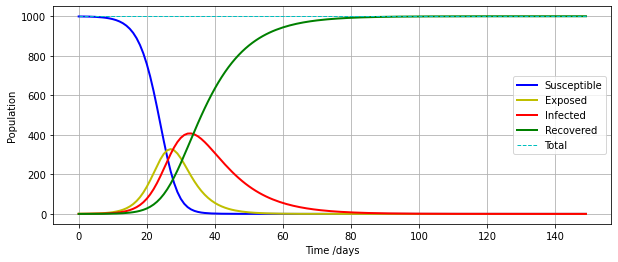

In [47]:
#calling plot_seir here
plot_seir(t,S,E,I,R)

## 2. Advanced Task: Lockdown


In this task you will build upon the previous model and you will introduce a Lockdown policy.
Until now, the model you defined was highly unrealistic as the R0-value was constant. If a government introduces a lockdown in the country then the basic reproductive number(R0) drops! Meaning that you have to adapt the parameters to change over time.  

Your task is as follows:

- Re-write the system of ODEs for SEIR in the function called deriv_seir_lockdown. The reason why you should define the function again, is that, this time, the $\beta$ is time dependent. Other than that, the system of ODEs remains the same. 

- Next, in the function, named model_seir_lockdown(), define:

    -the time dependent $R_0$ and $\beta$ as mentioned in 1, 2 just below the bullet points.

    -the initial conditions (one exposed, rest susceptible), 

    -the grid of time-points in days (150 days), 

    -the initial conditions vector and 
    
    -finally solve the system of ODEs. 




1. Time dependent $R_0$:


Say that the lockdown is introduced on day 30 after the first case of the disease in the country. In that case the $R_0$ drops to 0.9 the day of the lockdown. The value of $R_0$ before that day was 5.7

2. Time dependent $\beta$:

Remember that the definition of beta is $\beta$ = $R_0$* $\gamma$. If $R_0$ is time dependent then $\beta$ is also time dependent.     


To plot your model, the plot_seir() function that was defined in question .c is used again, but now in the list of parameters is also the lockdown.


In [48]:
def deriv_seir_lockdown(y, t, N, beta, gamma, delta):
    """
    Input: y, time grid, N: total population, beta: infectious rate, gamma: recovery rate, delta: incubation period 
    Output: dSdt, dEdt,  dIdt, dRdt
  
    Transform the above system of ODEs in python considering this time: time dependent beta

    """

    S, E, I, R = y
    #implement the new SEIR equations here. The SEIR equations are the same as defined above 
    
    ##but now beta is time dependent!: beta(t)

    dSdt = -beta(t) * I * S/N 

    dEdt = beta(t) * I * S/N - delta * E

    dIdt = delta * E - gamma * I 

    dRdt = gamma * I


    return dSdt, dEdt, dIdt, dRdt

In [49]:
def model_seir_lockdown(gamma, delta):
    """
    Input: gamma, delta
    Output: t,S,E,I,R,L


    step1: define, in R_0(t), the time dependent R0
    step2: define, in beta(t), the time dependent beta
    step3: set initial conditions, one exposed, rest susceptible
    step4: fill in the grid of time points (in days) (you should consider 150 days)
    step5: fill in the initial conditions vector
    step5: use odeint from scipy to solve the system ODEs

    """
    L = 30 #day of lockdown


    def R_0(t):
        #R0 equals to 5.7 if the current day is before the lockdown day (L) and R0 equals to 0.9 if the current day is equal or after the lockdown day (L)

        #write your code here for R_0(t)
        return 5.7 if t < L else 0.9
    
    def beta(t):
        #remember beta = R0*gamma

        #write your code here for beta(t)
        return R_0(t) * gamma

    #write your code here (after step3)
    S0, E0, I0, R0 = N-1, 1, 0, 0  

    #S0, I0, R0 = N, 1, 0

    # Step 2: define the grid of time points in days (use 150 days) 

    t = np.linspace(0, 149, 150) 

    # Step 3: define the initial conditions vector y0

    y0 = S0, E0, I0, R0

    # Step 4: solve the system of ODEs using odeint from scipy

    ret = odeint(deriv_seir_lockdown, y0, t,args = (N, beta, gamma, delta)) 

    S, E, I, R = ret.T 

    return t, S, E, I, R, L

In [50]:
N=1000
D = 10
gamma = 1.0/D
delta = 1.0/5.0

In [51]:
#calling the model_seir_lockdown function that you defined above and storing the results in t, S, E, I, R, L
t, S, E, I, R, L = model_seir_lockdown(gamma,delta)

In [52]:
#If you complete the method, you can run the following line to check whether your functions are correct or not. 
check_model_seir_lockdown(t,S,E,I,R,L)

SEIR model with lockdown test
The time grid is correct
The susceptible population array is correct
The exposed population array is correct
The infected population array is correct
The recovered population array is correct
Correct day of lockdown


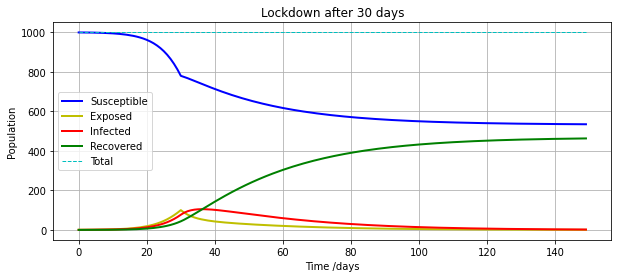

In [53]:
#calling plot_seir() here
plot_seir(t, S, E, I, R, L)